# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Team Code Keys

* BRN = Brooklyn Eagles
* CAG = Chicago American Giants
* HOM = Homestead Grays
* NSH = Nashville Elite Giants
* NW1 = Newark Dodgers
* NW2 = Newark Eagles
* NY5 = New York Black Yankees
* NY6 = New York Cubans
* PH5 = Philadelphia Stars
* PTC = Pittsburgh Crawfords
* WEG = Washington Elite Giants

# Gameinfo.csv Exploration

In [2]:
game_info = pd.read_csv("gameinfo.csv")
game_info.columns

Index(['gid', 'visteam', 'hometeam', 'site', 'date', 'number', 'starttime',
       'daynight', 'innings', 'tiebreaker', 'usedh', 'htbf', 'timeofgame',
       'attendance', 'fieldcond', 'precip', 'sky', 'temp', 'winddir',
       'windspeed', 'oscorer', 'forfeit', 'suspend', 'umphome', 'ump1b',
       'ump2b', 'ump3b', 'umplf', 'umprf', 'wp', 'lp', 'save', 'gametype',
       'vruns', 'hruns', 'wteam', 'lteam', 'line', 'batteries', 'lineups',
       'box', 'pbp', 'season'],
      dtype='object')

In [3]:
# Drop unncessary columns...
truncated_game_info = game_info.drop(columns = ["starttime", "daynight", "innings", 
                                                "tiebreaker", "usedh", "htbf", "timeofgame", 
                                                "fieldcond", "precip", "sky", "temp", "winddir",
                                                "windspeed", "oscorer", "forfeit", "suspend", 
                                                "umphome", "ump1b", "ump2b", "ump3b", "umplf",
                                                "umprf", "wp", "lp", "save", "batteries"])
truncated_game_info.head()

,gid,visteam,hometeam,site,date,number,attendance,gametype,vruns,hruns,wteam,lteam,line,lineups,box,pbp,season
0,PHG190309120,CUX,PHG,PHI10,19030912,0,3887,championship,4,2,CUX,PHG,y,y,y,d,1903
1,CUX190309131,PHG,CUX,NYC18,19030913,1,3000,championship,1,8,CUX,PHG,y,y,y,NaN,1903
2,PHG190309132,CUX,PHG,NYC18,19030913,2,8000,championship,2,5,PHG,CUX,y,y,y,NaN,1903
3,CUX190309140,PHG,CUX,TRE02,19030914,0,2500,championship,1,3,CUX,PHG,y,y,y,d,1903
4,PHG190309150,CUX,PHG,CAM02,19030915,0,3000,championship,0,3,PHG,CUX,y,y,y,d,1903


In [4]:
truncated_game_info['season'].value_counts(sort=False, dropna=False)

season
1903      7
1904      3
1912      1
1913     15
1915      1
1916      2
1920      7
1921     35
1922      4
1923      1
1924     16
1925     42
1926     42
1927     35
1928     25
1929     28
1930     55
1931     18
1932     20
1933     27
1934     28
1935    342
1936    327
1937    532
1938    442
1939    430
1940    399
1941    405
1942    481
1943    540
1944    594
1945    559
1946    596
1947    592
1948    549
1949    467
1950      1
1951      1
1952      1
1953      1
1954      1
1955      1
1956      1
1957      1
1958      2
1959      1
1960      1
1961      1
1962      1
Name: count, dtype: int64

## Aggregating postseason games

In [5]:
# Add a column called gt that aggregates postseason games into a single category
truncated_game_info['gt'] = ['postseason' if x=='championship' 
                            or x=='lcs' or x=='divisionseries' or x=='playoff'
                            else x for x in truncated_game_info['gametype']]

In [6]:
truncated_game_info['gt'].value_counts(dropna=False)

gt
regular       4989
exhibition    2371
postseason     250
allstar         70
Regular          1
Name: count, dtype: int64

In [7]:
# One game is miscoded as 'Regular'?
truncated_game_info[truncated_game_info['gt']=='Regular']

,gid,visteam,hometeam,site,date,number,attendance,gametype,vruns,hruns,wteam,lteam,line,lineups,box,pbp,season,gt
661,HOM193508100,BRN,HOM,ALT02,19350810,0,NaN,Regular,13,11,BRN,HOM,y,y,y,NaN,1935,Regular


* Note to self: Email tthress@retrosheet.org regarding corrections

In [8]:
truncated_game_info.loc[661, 'gt'] = 'regular'

In [9]:
truncated_game_info.loc[661]

gid           HOM193508100
visteam                BRN
hometeam               HOM
site                 ALT02
date              19350810
number                   0
attendance             NaN
gametype           Regular
vruns                   13
hruns                   11
wteam                  BRN
lteam                  HOM
line                     y
lineups                  y
box                      y
pbp                    NaN
season                1935
gt                 regular
Name: 661, dtype: object

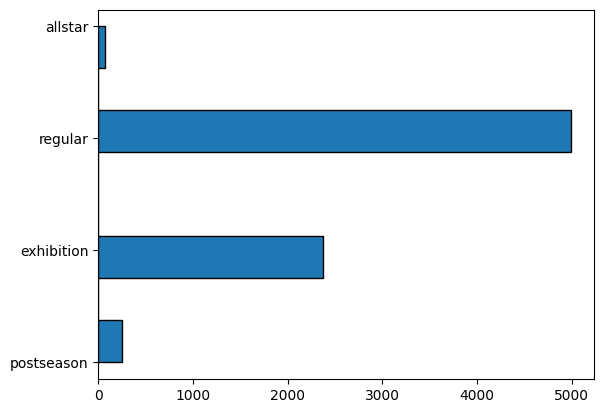

In [10]:
fig, gametype_hist = plt.subplots()
gametype_hist.hist(x=truncated_game_info['gt'], orientation ='horizontal', bins=8, align='mid', edgecolor='black')
plt.show()

In [11]:
truncated_game_info['gt'].value_counts()

gt
regular       4990
exhibition    2371
postseason     250
allstar         70
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

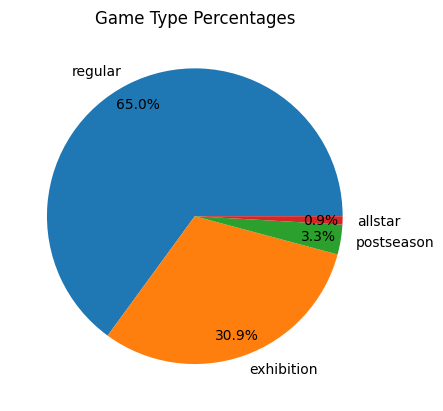

In [12]:
fig, gametype_pie = plt.subplots()
gametype_pie.pie(truncated_game_info['gt'].value_counts(), 
                labels=truncated_game_info['gt'].value_counts().index,
                autopct='%1.1f%%', pctdistance=0.85)
gametype_pie.set_title("Game Type Percentages")
plt.show

## Exploring Regular Season Games by Season

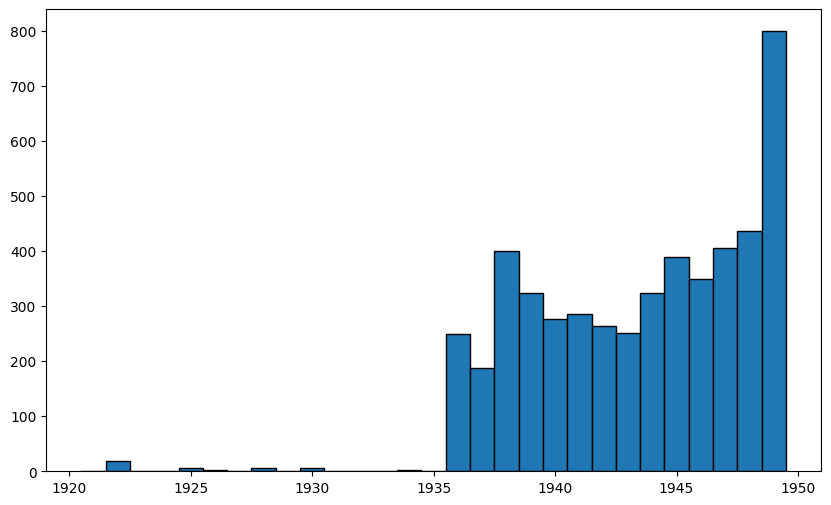

In [13]:
fig, season_hist = plt.subplots(figsize=(10,6))
season_hist.hist(x=game_info['season'][game_info['gametype']=='regular'], 
orientation ='vertical', bins='auto', edgecolor='black', align='right')
plt.show()

In [14]:
tgi_pre_20 = truncated_game_info[truncated_game_info['season'] < 1920]
tgi_pre_20

,gid,visteam,hometeam,site,date,number,attendance,gametype,vruns,hruns,wteam,lteam,line,lineups,box,pbp,season,gt
0,PHG190309120,CUX,PHG,PHI10,19030912,0,3887,championship,4,2,CUX,PHG,y,y,y,d,1903,postseason
1,CUX190309131,PHG,CUX,NYC18,19030913,1,3000,championship,1,8,CUX,PHG,y,y,y,NaN,1903,postseason
2,PHG190309132,CUX,PHG,NYC18,19030913,2,8000,championship,2,5,PHG,CUX,y,y,y,NaN,1903,postseason
3,CUX190309140,PHG,CUX,TRE02,19030914,0,2500,championship,1,3,CUX,PHG,y,y,y,d,1903,postseason
4,PHG190309150,CUX,PHG,CAM02,19030915,0,3000,championship,0,3,PHG,CUX,y,y,y,d,1903,postseason
5,CUX190309180,PHG,CUX,HRB01,19030918,0,0,championship,3,12,CUX,PHG,y,y,y,d,1903,postseason
6,PHG190309250,CUX,PHG,CAM02,19030925,0,0,championship,2,0,CUX,PHG,y,y,y,d,1903,postseason
7,CUX190409010,PHG,CUX,ACY01,19040901,0,4000,championship,8,4,PHG,CUX,y,y,y,NaN,1904,postseason
8,CUX190409020,PHG,CUX,ACY01,19040902,0,3000,championship,1,3,CUX,PHG,y,y,y,NaN,1904,postseason
9,CUX190409030,PHG,CUX,ACY01,19040903,0,5000,championship,4,2,PHG,CUX,y,y,y,NaN,1904,postseason


In [15]:
tgi_20_34 = truncated_game_info[truncated_game_info['season'] >= 1920]
tgi_20_34 = tgi_20_34[tgi_20_34['season'] <= 1934]
tgi_20_34

,gid,visteam,hometeam,site,date,number,attendance,gametype,vruns,hruns,wteam,lteam,line,lineups,box,pbp,season,gt
29,ACY192007112,NYL,ACY,NYC15,19200711,2,NaN,exhibition,7,5,NYL,ACY,y,NaN,NaN,NaN,1920,exhibition
30,NYL192007111,ACY,NYL,NYC15,19200711,1,16000,exhibition,5,0,ACY,NYL,y,NaN,NaN,NaN,1920,exhibition
31,KCM192008010,CAG,KCM,KAN02,19200801,0,15000,regular,4,5,KCM,CAG,y,y,y,NaN,1920,regular
32,ACY192008291,NYL,ACY,NYC15,19200829,1,10000,exhibition,0,6,ACY,NYL,y,y,y,NaN,1920,exhibition
33,ACY192008292,NYL,ACY,NYC15,19200829,2,10000,exhibition,3,7,ACY,NYL,y,y,y,NaN,1920,exhibition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,NNS193410230,ASD,NNS,PIT06,19341023,0,2500,exhibition,3,4,NNS,ASD,y,y,y,NaN,1934,exhibition
408,PRG193410270,PIR,PRG,LOS05,19341027,0,0,exhibition,8,9,PRG,PIR,y,y,y,NaN,1934,exhibition
409,PRG193410281,PIR,PRG,LOS05,19341028,1,0,exhibition,4,6,PRG,PIR,y,y,y,y,1934,exhibition
410,PRG193410282,PIR,PRG,LOS05,19341028,2,NaN,exhibition,4,10,PRG,PIR,y,NaN,NaN,NaN,1934,exhibition


In [16]:
tgi_35 = truncated_game_info[truncated_game_info['season'] == 1935]
tgi_35

,gid,visteam,hometeam,site,date,number,attendance,gametype,vruns,hruns,wteam,lteam,line,lineups,box,pbp,season,gt
412,HOM193504140,NW1,HOM,WIL07,19350414,0,NaN,exhibition,11,7,NW1,HOM,NaN,NaN,NaN,NaN,1935,exhibition
413,KCM193504220,CAG,KCM,MUS01,19350422,0,1500,exhibition,2,4,KCM,CAG,y,NaN,NaN,NaN,1935,exhibition
414,NSH193504220,NY6,NSH,GAD01,19350422,0,NaN,exhibition,6,1,NY6,NSH,y,NaN,NaN,NaN,1935,exhibition
415,KCM193504230,CAG,KCM,OKC02,19350423,0,NaN,exhibition,5,2,CAG,KCM,y,NaN,NaN,NaN,1935,exhibition
416,NSH193504230,NY6,NSH,GAD01,19350423,0,NaN,exhibition,5,2,NY6,NSH,y,NaN,NaN,NaN,1935,exhibition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,PRG193511102,PIR,PRG,LOS02,19351110,2,3000,exhibition,3,2,PIR,PRG,y,y,y,NaN,1935,exhibition
750,PRG193512011,PIR,PRG,LOS02,19351201,1,NaN,exhibition,4,6,PRG,PIR,y,y,y,NaN,1935,exhibition
751,PRG193512012,PIR,PRG,LOS02,19351201,2,NaN,exhibition,0,4,PRG,PIR,y,y,y,NaN,1935,exhibition
752,PRG193512221,PIR,PRG,LOS02,19351222,1,NaN,exhibition,3,11,PRG,PIR,NaN,NaN,NaN,NaN,1935,exhibition


In [17]:
tgi_36 = truncated_game_info[truncated_game_info['season'] == 1936]
tgi_36

,gid,visteam,hometeam,site,date,number,attendance,gametype,vruns,hruns,wteam,lteam,line,lineups,box,pbp,season,gt
754,HOM193604131,WEG,HOM,ATL04,19360413,1,1500,exhibition,0,10,HOM,WEG,y,y,y,d,1936,exhibition
755,HOM193604132,WEG,HOM,ATL04,19360413,2,1500,exhibition,0,3,HOM,WEG,NaN,NaN,NaN,NaN,1936,exhibition
756,NW2193604170,HOM,NW2,ATH01,19360417,0,NaN,exhibition,7,7,NaN,NaN,NaN,NaN,NaN,NaN,1936,exhibition
757,HOM193604190,NW2,HOM,ATL04,19360419,0,1600,exhibition,2,0,NW2,HOM,y,y,y,d,1936,exhibition
758,WEG193604191,NY5,WEG,NSH02,19360419,1,NaN,exhibition,7,4,NY5,WEG,NaN,NaN,NaN,NaN,1936,exhibition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,MLS193610020,NNS,MLS,DES01,19361002,0,3500,exhibition,5,2,NNS,MLS,y,y,y,d,1936,exhibition
1077,MLS193610041,NNS,MLS,DEN03,19361004,1,0,exhibition,6,3,NNS,MLS,y,y,y,d,1936,exhibition
1078,NNS193610042,MLS,NNS,DEN03,19361004,2,0,exhibition,4,6,NNS,MLS,y,y,y,d,1936,exhibition
1079,MLS193610070,NNS,MLS,DES01,19361007,0,5000,exhibition,4,2,NNS,MLS,y,y,y,d,1936,exhibition


In [18]:
tgi_37 = truncated_game_info[truncated_game_info['season'] == 1937]
tgi_37

,gid,visteam,hometeam,site,date,number,attendance,gametype,vruns,hruns,wteam,lteam,line,lineups,box,pbp,season,gt
1081,JAX193703290,HOM,JAX,JKV01,19370329,0,4000,exhibition,2,1,HOM,JAX,y,NaN,NaN,NaN,1937,exhibition
1082,JAX193703310,HOM,JAX,JKV01,19370331,0,NaN,exhibition,7,6,HOM,JAX,NaN,NaN,NaN,NaN,1937,exhibition
1083,MEM193704110,HOM,MEM,MEM02,19370411,0,NaN,exhibition,10,2,HOM,MEM,y,y,y,NaN,1937,exhibition
1084,PTC193704110,CI1,PTC,NOL01,19370411,0,1500,exhibition,3,8,PTC,CI1,y,y,y,d,1937,exhibition
1085,CI1193704120,PTC,CI1,BAT01,19370412,0,NaN,exhibition,11,2,PTC,CI1,y,NaN,NaN,NaN,1937,exhibition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,KCM193710102,MLS,KCM,WIC01,19371010,2,2000,exhibition,4,5,KCM,MLS,y,y,y,d,1937,exhibition
1609,PRG193710100,WHK,PRG,LOS05,19371010,0,5000,exhibition,11,19,PRG,WHK,y,y,y,y,1937,exhibition
1610,MLS193710110,KCM,MLS,OKC01,19371011,0,0,exhibition,10,0,KCM,MLS,y,y,y,d,1937,exhibition
1611,PRG193711071,WHK,PRG,LOS05,19371107,1,0,exhibition,7,5,WHK,PRG,y,y,y,d,1937,exhibition


In [19]:
tgi_38 = truncated_game_info[truncated_game_info['season'] == 1938]
tgi_38

,gid,visteam,hometeam,site,date,number,attendance,gametype,vruns,hruns,wteam,lteam,line,lineups,box,pbp,season,gt
1613,JAX193803270,CAG,JAX,JKV01,19380327,0,NaN,exhibition,5,4,CAG,JAX,y,y,y,NaN,1938,exhibition
1614,JAX193804030,CAG,JAX,JKV01,19380403,0,NaN,exhibition,5,5,NaN,NaN,y,y,y,NaN,1938,exhibition
1615,MEM193804030,HOM,MEM,MEM02,19380403,0,1000,exhibition,7,3,HOM,MEM,y,y,y,y,1938,exhibition
1616,JAX193804080,CAG,JAX,DTB01,19380408,0,0,exhibition,7,6,CAG,JAX,y,y,y,d,1938,exhibition
1617,JAX193804100,CAG,JAX,JKV01,19380410,0,0,exhibition,3,0,CAG,JAX,y,y,y,d,1938,exhibition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,ATN193809251,BIR,ATN,ATL04,19380925,1,3500,exhibition,3,5,ATN,BIR,y,y,y,d,1938,exhibition
2051,ATN193809252,BIR,ATN,ATL04,19380925,2,3500,exhibition,3,5,ATN,BIR,y,y,y,d,1938,exhibition
2052,NNL193809250,NAL,NNL,NYC14,19380925,0,13000,allstar,4,5,NNL,NAL,y,y,y,d,1938,allstar
2053,SAS193810020,NAS,SAS,MEM02,19381002,0,0,allstar,1,3,SAS,NAS,y,y,y,d,1938,allstar


In [20]:
tgi_39 = truncated_game_info[truncated_game_info['season'] == 1939]
tgi_39

,gid,visteam,hometeam,site,date,number,attendance,gametype,vruns,hruns,wteam,lteam,line,lineups,box,pbp,season,gt
2055,CV9193903260,CAG,CV9,JKV01,19390326,0,NaN,exhibition,1,2,CV9,CAG,y,NaN,NaN,NaN,1939,exhibition
2056,CV9193903270,CAG,CV9,JKV01,19390327,0,0,exhibition,2,3,CV9,CAG,y,y,y,d,1939,exhibition
2057,MEM193904020,BLG,MEM,MEM02,19390402,0,NaN,exhibition,2,4,MEM,BLG,NaN,NaN,NaN,NaN,1939,exhibition
2058,CV9193904030,CAG,CV9,JKV01,19390403,0,NaN,exhibition,8,3,CAG,CV9,y,y,y,NaN,1939,exhibition
2059,HOM193904050,NW2,HOM,ORL01,19390405,0,1200,exhibition,1,7,HOM,NW2,NaN,NaN,NaN,NaN,1939,exhibition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2480,SAS193910010,NAS,SAS,NOL01,19391001,0,2000,allstar,10,1,NAS,SAS,y,y,y,NaN,1939,allstar
2481,MLS193910080,NNS,MLS,BAL10,19391008,0,2000,exhibition,1,3,MLS,NNS,y,y,y,d,1939,exhibition
2482,PRG193910081,PIR,PRG,LOS04,19391008,1,3800,exhibition,5,3,PIR,PRG,y,y,y,y,1939,exhibition
2483,PRG193910082,PIR,PRG,LOS04,19391008,2,3800,exhibition,3,2,PIR,PRG,y,y,y,d,1939,exhibition


In [21]:
tgi_40 = truncated_game_info[truncated_game_info['season'] == 1940]
tgi_40

,gid,visteam,hometeam,site,date,number,attendance,gametype,vruns,hruns,wteam,lteam,line,lineups,box,pbp,season,gt
2485,CV9194003240,SNO,CV9,JKV01,19400324,0,2837,exhibition,4,6,CV9,SNO,y,y,y,NaN,1940,exhibition
2486,BIR194003310,MEM,BIR,JAC01,19400331,0,NaN,exhibition,10,8,MEM,BIR,NaN,NaN,NaN,NaN,1940,exhibition
2487,BLG194003310,NY5,BLG,ATL05,19400331,0,1000,exhibition,13,2,NY5,BLG,NaN,NaN,NaN,NaN,1940,exhibition
2488,CV9194003310,SNO,CV9,JKV01,19400331,0,NaN,exhibition,3,4,CV9,SNO,y,y,y,NaN,1940,exhibition
2489,HOM194004050,CV9,HOM,ORL01,19400405,0,904,exhibition,9,10,HOM,CV9,y,y,y,NaN,1940,exhibition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2879,MEM194009220,NY6,MEM,MEM02,19400922,0,NaN,exhibition,4,3,NY6,MEM,y,y,y,NaN,1940,exhibition
2880,MEM194009290,SNO,MEM,MEM02,19400929,0,NaN,exhibition,5,10,MEM,SNO,y,y,y,NaN,1940,exhibition
2881,SAS194010010,NAS,SAS,NOL01,19401001,0,3000,allstar,2,1,NAS,SAS,y,y,y,NaN,1940,allstar
2882,AST194010041,NAS,AST,NOL01,19401004,1,0,allstar,8,0,NAS,AST,y,y,y,NaN,1940,allstar


In [22]:
tgi_41 = truncated_game_info[truncated_game_info['season'] == 1941]
tgi_41

,gid,visteam,hometeam,site,date,number,attendance,gametype,vruns,hruns,wteam,lteam,line,lineups,box,pbp,season,gt
2884,JAX194104060,KCM,JAX,JKV01,19410406,0,NaN,exhibition,2,10,JAX,KCM,NaN,NaN,NaN,NaN,1941,exhibition
2885,MEM194104060,NY5,MEM,MEM02,19410406,0,NaN,exhibition,1,4,MEM,NY5,y,y,y,NaN,1941,exhibition
2886,HOM194104090,KCM,HOM,ORL01,19410409,0,NaN,exhibition,3,2,KCM,HOM,y,NaN,NaN,NaN,1941,exhibition
2887,SNO194104090,CAG,SNO,BAT01,19410409,0,NaN,exhibition,17,3,CAG,SNO,NaN,NaN,NaN,NaN,1941,exhibition
2888,SNO194104100,CAG,SNO,HML01,19410410,0,NaN,exhibition,7,15,SNO,CAG,NaN,NaN,NaN,NaN,1941,exhibition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284,MLS194110050,KCM,MLS,STL07,19411005,0,10124,exhibition,1,4,MLS,KCM,y,y,y,NaN,1941,exhibition
3285,TWA194110080,ECG,TWA,LOS02,19411008,0,0,exhibition,6,9,TWA,ECG,y,y,y,NaN,1941,exhibition
3286,ECG194110191,PIR,ECG,LOS02,19411019,1,3000,exhibition,10,7,PIR,ECG,y,y,y,NaN,1941,exhibition
3287,ECG194110192,PIR,ECG,LOS02,19411019,2,3000,exhibition,2,1,PIR,ECG,NaN,NaN,NaN,NaN,1941,exhibition


In [23]:
tgi_42 = truncated_game_info[truncated_game_info['season'] == 1942]
tgi_42

,gid,visteam,hometeam,site,date,number,attendance,gametype,vruns,hruns,wteam,lteam,line,lineups,box,pbp,season,gt
3289,KCM194204050,CCB,KCM,MNL01,19420405,0,4000,exhibition,12,9,CCB,KCM,NaN,NaN,NaN,NaN,1942,exhibition
3290,MEM194204050,BLG,MEM,MEM02,19420405,0,2000,exhibition,1,5,MEM,BLG,y,y,y,NaN,1942,exhibition
3291,BIR194204080,CCB,BIR,BOG01,19420408,0,NaN,exhibition,5,6,BIR,CCB,NaN,NaN,NaN,NaN,1942,exhibition
3292,BIR194204120,CCB,BIR,JAC01,19420412,0,2000,exhibition,3,1,CCB,BIR,NaN,NaN,NaN,NaN,1942,exhibition
3293,BLG194204121,NY6,BLG,NOL01,19420412,1,NaN,exhibition,3,4,BLG,NY6,y,NaN,NaN,NaN,1942,exhibition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,PRG194210112,PIR,PRG,LOS02,19421011,2,6000,exhibition,4,1,PIR,PRG,y,y,y,NaN,1942,exhibition
3766,NAL194210120,NY5,NAL,MEM03,19421012,0,NaN,exhibition,2,3,NAL,NY5,y,NaN,NaN,NaN,1942,exhibition
3767,PRG194210181,PIR,PRG,LOS02,19421018,1,1000,exhibition,4,1,PIR,PRG,y,y,y,NaN,1942,exhibition
3768,PRG194210182,PIR,PRG,LOS02,19421018,2,1000,exhibition,8,2,PIR,PRG,y,y,y,NaN,1942,exhibition


In [24]:
tgi_43 = truncated_game_info[truncated_game_info['season'] == 1943]
tgi_43

,gid,visteam,hometeam,site,date,number,attendance,gametype,vruns,hruns,wteam,lteam,line,lineups,box,pbp,season,gt
3770,BIR194304041,MEM,BIR,BIR01,19430404,1,NaN,exhibition,8,5,MEM,BIR,y,y,y,NaN,1943,exhibition
3771,BIR194304042,MEM,BIR,BIR01,19430404,2,NaN,exhibition,0,11,BIR,MEM,NaN,NaN,NaN,NaN,1943,exhibition
3772,MEM194304110,BIR,MEM,MEM03,19430411,0,NaN,exhibition,2,1,BIR,MEM,y,NaN,NaN,NaN,1943,exhibition
3773,CVB194304180,HOM,CVB,CAN03,19430418,0,NaN,exhibition,4,3,HOM,CVB,NaN,NaN,NaN,NaN,1943,exhibition
3774,BIR194304190,CI2,BIR,MTG01,19430419,0,2000,exhibition,8,3,CI2,BIR,y,NaN,NaN,NaN,1943,exhibition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,BCG194311071,PIR,BCG,LOS04,19431107,1,7800,exhibition,8,11,BCG,PIR,y,y,y,d,1943,exhibition
4306,BCG194311072,PIR,BCG,LOS04,19431107,2,7800,exhibition,4,3,PIR,BCG,y,y,y,d,1943,exhibition
4307,KCR194311110,WPS,KCR,LOS02,19431111,0,4000,exhibition,1,4,KCR,WPS,y,y,y,d,1943,exhibition
4308,KCR194311141,MLS,KCR,LOS02,19431114,1,NaN,exhibition,6,2,MLS,KCR,y,NaN,NaN,NaN,1943,exhibition


In [25]:
tgi_44 = truncated_game_info[truncated_game_info['season'] == 1944]
tgi_44

,gid,visteam,hometeam,site,date,number,attendance,gametype,vruns,hruns,wteam,lteam,line,lineups,box,pbp,season,gt
4310,BIR194404021,CAG,BIR,BIR01,19440402,1,4000,exhibition,1,9,BIR,CAG,y,NaN,NaN,NaN,1944,exhibition
4311,BIR194404022,CAG,BIR,BIR01,19440402,2,4000,exhibition,7,9,BIR,CAG,y,NaN,NaN,NaN,1944,exhibition
4312,MEM194404070,CVB,MEM,MEM02,19440407,0,NaN,exhibition,5,10,MEM,CVB,y,NaN,NaN,NaN,1944,exhibition
4313,BIR194404090,CVB,BIR,BIR01,19440409,0,NaN,exhibition,2,10,BIR,CVB,NaN,NaN,NaN,NaN,1944,exhibition
4314,KCM194404090,NY6,KCM,NOL01,19440409,0,6000,exhibition,4,1,NY6,KCM,y,NaN,NaN,NaN,1944,exhibition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,KCR194410221,MLS,KCR,LOS05,19441022,1,1500,exhibition,1,3,KCR,MLS,y,NaN,NaN,NaN,1944,exhibition
4900,MLS194410222,KCR,MLS,LOS05,19441022,2,1500,exhibition,2,0,KCR,MLS,y,NaN,NaN,NaN,1944,exhibition
4901,KCR194410250,BIR,KCR,LOS02,19441025,0,4500,exhibition,2,3,KCR,BIR,NaN,NaN,NaN,NaN,1944,exhibition
4902,KCR194411010,BIR,KCR,LOS02,19441101,0,4000,exhibition,3,3,NaN,NaN,y,NaN,NaN,NaN,1944,exhibition


In [26]:
tgi_45 = truncated_game_info[truncated_game_info['season'] == 1945]
tgi_45

,gid,visteam,hometeam,site,date,number,attendance,gametype,vruns,hruns,wteam,lteam,line,lineups,box,pbp,season,gt
4904,NY6194504010,BIR,NY6,NOL01,19450401,0,3500,exhibition,1,3,NY6,BIR,y,y,y,NaN,1945,exhibition
4905,KCM194504040,CAG,KCM,FTW01,19450404,0,1000,exhibition,3,2,CAG,KCM,NaN,NaN,NaN,NaN,1945,exhibition
4906,BIR194504081,KCM,BIR,BIR01,19450408,1,0,exhibition,7,0,KCM,BIR,y,y,y,d,1945,exhibition
4907,BIR194504082,KCM,BIR,BIR01,19450408,2,NaN,exhibition,0,2,BIR,KCM,y,NaN,NaN,NaN,1945,exhibition
4908,MEM194504080,CAG,MEM,MEM03,19450408,0,4672,exhibition,0,8,MEM,CAG,y,NaN,NaN,NaN,1945,exhibition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458,CDA194510141,NNS,CDA,NYC15,19451014,1,0,exhibition,1,4,CDA,NNS,y,y,y,d,1945,exhibition
5459,CDA194510142,NNS,CDA,NYC15,19451014,2,10000,exhibition,0,0,NaN,NaN,y,y,y,d,1945,exhibition
5460,PRK194510210,KCR,PRK,SAN03,19451021,0,0,exhibition,4,1,KCR,PRK,y,y,y,d,1945,exhibition
5461,SPZ194510210,BIR,SPZ,SFO01,19451021,0,8300,exhibition,4,5,SPZ,BIR,y,y,y,d,1945,exhibition


In [27]:
tgi_46 = truncated_game_info[truncated_game_info['season'] == 1946]
tgi_46

,gid,visteam,hometeam,site,date,number,attendance,gametype,vruns,hruns,wteam,lteam,line,lineups,box,pbp,season,gt
5463,BIR194603310,CAG,BIR,BIR01,19460331,0,NaN,exhibition,3,4,BIR,CAG,y,NaN,NaN,NaN,1946,exhibition
5464,MEM194603310,CVB,MEM,MEM03,19460331,0,6372,exhibition,7,12,MEM,CVB,y,NaN,NaN,NaN,1946,exhibition
5465,NY6194604020,HOM,NY6,NOL01,19460402,0,0,exhibition,5,0,HOM,NY6,y,y,y,d,1946,exhibition
5466,KCM194604030,CCR,KCM,HOU04,19460403,0,3000,exhibition,3,9,KCM,CCR,y,NaN,NaN,NaN,1946,exhibition
5467,KCM194604040,CCR,KCM,HOU04,19460404,0,NaN,exhibition,2,6,KCM,CCR,NaN,NaN,NaN,NaN,1946,exhibition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6054,SAS194610130,NAS,SAS,BIR01,19461013,0,NaN,allstar,6,4,NAS,SAS,y,NaN,NaN,NaN,1946,allstar
6055,ASF194610140,ASP,ASF,KAN05,19461014,0,5561,exhibition,1,4,ASF,ASP,y,y,y,d,1946,exhibition
6056,KCR194610160,ASF,KCR,LOS02,19461016,0,22577,exhibition,4,3,ASF,KCR,y,y,y,d,1946,exhibition
6057,ASF194610170,KCR,ASF,SAN03,19461017,0,10600,exhibition,0,2,ASF,KCR,y,y,y,d,1946,exhibition


In [28]:
tgi_47 = truncated_game_info[truncated_game_info['season'] == 1947]
tgi_47

,gid,visteam,hometeam,site,date,number,attendance,gametype,vruns,hruns,wteam,lteam,line,lineups,box,pbp,season,gt
6059,KCM194704110,BIR,KCM,WAC01,19470411,0,NaN,exhibition,4,1,BIR,KCM,y,NaN,NaN,NaN,1947,exhibition
6060,MEM194704120,IN9,MEM,MEM02,19470412,0,NaN,exhibition,3,13,MEM,IN9,y,NaN,NaN,NaN,1947,exhibition
6061,BLG194704130,CAG,BLG,NSH02,19470413,0,0,exhibition,1,4,BLG,CAG,y,y,y,d,1947,exhibition
6062,MEM194704131,IN9,MEM,MEM02,19470413,1,NaN,exhibition,0,3,MEM,IN9,y,NaN,NaN,NaN,1947,exhibition
6063,MEM194704132,IN9,MEM,MEM02,19470413,2,NaN,exhibition,1,0,IN9,MEM,y,NaN,NaN,NaN,1947,exhibition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6646,ASF194710180,KCR,ASF,SAN03,19471018,0,3500,exhibition,5,4,KCR,ASF,y,NaN,NaN,NaN,1947,exhibition
6647,KCR194710190,ASF,KCR,LOS02,19471019,0,12160,exhibition,2,1,ASF,KCR,y,y,y,d,1947,exhibition
6648,KCR194710230,MLS,KCR,LOS02,19471023,0,4268,exhibition,3,4,KCR,MLS,y,y,y,d,1947,exhibition
6649,KCR194710260,MLS,KCR,LOS02,19471026,0,7416,exhibition,2,3,KCR,MLS,y,y,y,d,1947,exhibition


In [29]:
tgi_48 = truncated_game_info[truncated_game_info['season'] == 1948]
tgi_48

,gid,visteam,hometeam,site,date,number,attendance,gametype,vruns,hruns,wteam,lteam,line,lineups,box,pbp,season,gt
6651,BLG194804110,CAG,BLG,NSH02,19480411,0,NaN,exhibition,1,2,BLG,CAG,y,NaN,NaN,NaN,1948,exhibition
6652,KCM194804110,IN9,KCM,AUS01,19480411,0,3565,exhibition,5,6,KCM,IN9,y,y,y,d,1948,exhibition
6653,MEM194804111,CVB,MEM,MEM02,19480411,1,3900,exhibition,10,4,CVB,MEM,y,NaN,NaN,NaN,1948,exhibition
6654,MEM194804112,CVB,MEM,MEM02,19480411,2,3900,exhibition,1,4,MEM,CVB,y,NaN,NaN,NaN,1948,exhibition
6655,IN9194804150,KCM,IN9,JAC01,19480415,0,NaN,exhibition,12,7,KCM,IN9,NaN,NaN,NaN,NaN,1948,exhibition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,KCR194810240,MLS,KCR,LOS02,19481024,0,13552,exhibition,3,4,KCR,MLS,y,y,y,d,1948,exhibition
7196,MLS194810250,KCR,MLS,SAN03,19481025,0,5264,exhibition,7,5,KCR,MLS,y,y,y,d,1948,exhibition
7197,KCR194810310,MLS,KCR,LOS02,19481031,0,14625,exhibition,8,4,MLS,KCR,y,y,y,d,1948,exhibition
7198,KCR194811071,MLS,KCR,LOS02,19481107,1,0,exhibition,8,7,MLS,KCR,y,y,y,d,1948,exhibition


In [30]:
tgi_49 = truncated_game_info[truncated_game_info['season'] == 1949]
tgi_49

,gid,visteam,hometeam,site,date,number,attendance,gametype,vruns,hruns,wteam,lteam,line,lineups,box,pbp,season,gt
7200,BIR194903270,LCB,BIR,TUS01,19490327,0,3000,exhibition,7,4,LCB,BIR,y,NaN,NaN,NaN,1949,exhibition
7201,MEM194903270,NY6,MEM,MEM02,19490327,0,NaN,exhibition,4,6,MEM,NY6,y,NaN,NaN,NaN,1949,exhibition
7202,BIR194903300,LCB,BIR,AXC01,19490330,0,NaN,exhibition,0,2,BIR,LCB,NaN,NaN,NaN,NaN,1949,exhibition
7203,HOE194903300,CAG,HOE,HOU04,19490330,0,NaN,exhibition,3,8,HOE,CAG,y,NaN,NaN,NaN,1949,exhibition
7204,BIR194904010,LCB,BIR,OZA01,19490401,0,NaN,exhibition,4,5,BIR,LCB,NaN,NaN,NaN,NaN,1949,exhibition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7662,BIR194909280,MEM,BIR,MTG01,19490928,0,NaN,exhibition,11,1,MEM,BIR,NaN,NaN,NaN,NaN,1949,exhibition
7663,KCM194909280,IN9,KCM,HOU04,19490928,0,2000,exhibition,3,2,IN9,KCM,y,NaN,NaN,NaN,1949,exhibition
7664,BIR194909290,MEM,BIR,MTG01,19490929,0,NaN,exhibition,4,5,BIR,MEM,NaN,NaN,NaN,NaN,1949,exhibition
7665,BIR194910021,IN9,BIR,BIR01,19491002,1,NaN,exhibition,8,2,IN9,BIR,NaN,NaN,NaN,NaN,1949,exhibition


In [31]:
tgi_50_plus = truncated_game_info[truncated_game_info['season'] >= 1950]
tgi_50_plus

,gid,visteam,hometeam,site,date,number,attendance,gametype,vruns,hruns,wteam,lteam,line,lineups,box,pbp,season,gt
7667,ASW195008200,ASE,ASW,CHI10,19500820,0,24614,allstar,3,5,ASW,ASE,y,y,y,d,1950,allstar
7668,ASW195108120,ASE,ASW,CHI10,19510812,0,21312,allstar,3,1,ASE,ASW,y,y,y,d,1951,allstar
7669,ASW195208170,ASE,ASW,CHI10,19520817,0,18279,allstar,3,7,ASW,ASE,y,y,y,d,1952,allstar
7670,ASW195308160,ASE,ASW,CHI10,19530816,0,10000,allstar,1,5,ASW,ASE,y,y,y,d,1953,allstar
7671,ASW195408220,ASE,ASW,CHI10,19540822,0,10000,allstar,4,8,ASW,ASE,y,y,y,d,1954,allstar
7672,ASW195507310,ASE,ASW,CHI10,19550731,0,11257,allstar,0,2,ASW,ASE,y,y,y,d,1955,allstar
7673,ASW195608120,ASE,ASW,CHI10,19560812,0,8567,allstar,11,5,ASE,ASW,y,y,y,NaN,1956,allstar
7674,ASW195707280,ASE,ASW,CHI10,19570728,0,10500,allstar,5,8,ASW,ASE,y,y,y,d,1957,allstar
7675,ASW195808240,ASE,ASW,CHI10,19580824,0,9527,allstar,4,3,ASE,ASW,y,y,y,d,1958,allstar
7676,ASW195808310,ASE,ASW,NYC16,19580831,0,NaN,allstar,6,5,ASE,ASW,y,NaN,NaN,NaN,1958,allstar


In [32]:
def gt_count_extractor(df):
    r = sum(df['gt']=='regular') #  Convert to bool then sum column
    e = sum(df['gt']=='exhibition')
    p = sum(df['gt']=='postseason')
    a = sum(df['gt']=='allstar')
    return r, e, p, a

def gt_count_printer(df):
    r, e, p, a = gt_count_extractor(df)
    print(f'Regular season games: {r}')
    print(f'Exhibition games: {e}')
    print(f'Postseaon games: {p}')
    print(f'All-Star games: {a}')

In [33]:
gt_count_printer(tgi_42)

Regular season games: 251
Exhibition games: 223
Postseaon games: 5
All-Star games: 2


In [34]:
tgi_42['gt'].value_counts()

gt
regular       251
exhibition    223
postseason      5
allstar         2
Name: count, dtype: int64

In [35]:
gt_count_printer(tgi_50_plus)

Regular season games: 0
Exhibition games: 0
Postseaon games: 0
All-Star games: 14


In [36]:
season_array = [tgi_pre_20, tgi_20_34, tgi_35, tgi_36, tgi_37, tgi_38, tgi_39, tgi_40, tgi_41, tgi_42, 
                tgi_43, tgi_44, tgi_45, tgi_46, tgi_47, tgi_48, tgi_49, tgi_50_plus]
season_labels =['Pre-1920', '1920-34', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942',
                '1943', '1944', '1945', '1946', '1947', '1948', '1949', 'Post-1950']

In [37]:
season_array_totals = []
for s in season_array:
    season_array_totals.append(s.shape[0])
season_array_totals

[29,
 383,
 342,
 327,
 532,
 442,
 430,
 399,
 405,
 481,
 540,
 594,
 559,
 596,
 592,
 549,
 467,
 14]

<positron-console-cell-38>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


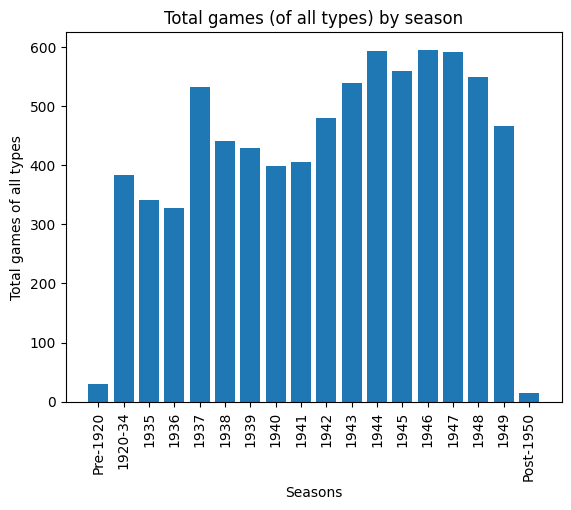

In [38]:
fig, season_bar_1 = plt.subplots()
season_bar_1.bar(x=season_labels, height=season_array_totals)
season_bar_1.set_title('Total games (of all types) by season')
season_bar_1.set_xlabel('Seasons')
season_bar_1.set_ylabel('Total games of all types')
season_bar_1.set_xticklabels(season_labels, rotation=90)
plt.show()

In [39]:
s_regular = []
s_exhibition = []
s_postseason = []
s_allstar = []
for s in season_array:
    amt = gt_count_extractor(s)
    s_regular.append(amt[0])
    s_exhibition.append(amt[1])
    s_postseason.append(amt[2])
    s_allstar.append(amt[3])
s_regular

[0,
 48,
 250,
 187,
 400,
 323,
 277,
 286,
 263,
 251,
 324,
 390,
 350,
 406,
 436,
 423,
 376,
 0]

<positron-console-cell-40>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


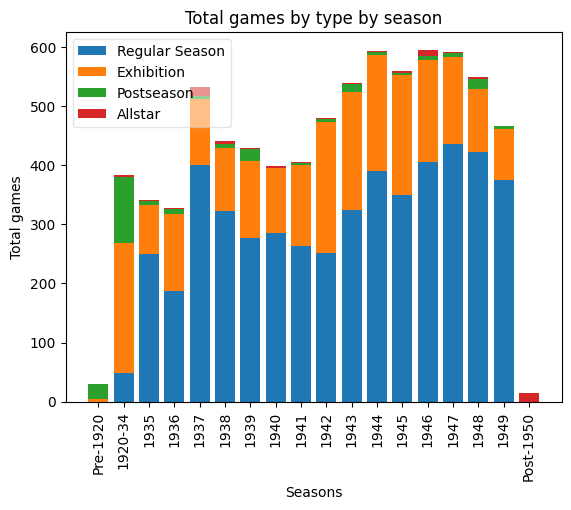

In [40]:
fig, stacked_bar = plt.subplots()
stacked_bar.bar(x=season_labels, height=s_regular, label='Regular Season')
stacked_bar.bar(x=season_labels, height=s_exhibition, bottom=s_regular, label='Exhibition')
stacked_bar.bar(x=season_labels, height=s_postseason, 
                bottom=[r + e for r, e in zip(s_regular, s_exhibition)], label='Postseason')
stacked_bar.bar(x=season_labels, height=s_allstar,
                bottom=[r + e + p for r, e, p in zip(s_regular, s_exhibition, s_postseason)],
                label='Allstar')
stacked_bar.set_title('Total games by type by season')
stacked_bar.set_xlabel('Seasons')
stacked_bar.set_ylabel('Total games')
stacked_bar.set_xticklabels(season_labels, rotation=90)
stacked_bar.legend(framealpha=0.5)
plt.show()

In [41]:
def extract_regular_season_table(arr):
    reg_arr = arr[arr['gametype'] =='regular']
    teams = set()
    for team in (reg_arr['hometeam'].unique()):
        teams.add(team)
    for team in (reg_arr['visteam'].unique()):
        teams.add(team)
    standings_dict = {}
    for team in teams:
        standings_dict[team] = [[0,0,0],[0,0,0]] # Home win, loss, tie; road win, loss, tie
    for g in reg_arr.itertuples():
        if g.hruns > g.vruns:
            standings_dict[g.hometeam][0][0] += 1
            standings_dict[g.visteam][1][1] += 1
        elif g.hruns < g.vruns:
            standings_dict[g.hometeam][0][1] += 1
            standings_dict[g.visteam][1][0] += 1
        elif g.hruns == g.vruns:
            standings_dict[g.hometeam][0][2] += 1
            standings_dict[g.visteam][1][2] += 1
        else:
            print('unknown')
    return standings_dict

In [42]:
standings_array = []
for s in season_array:
    standings_array.append(extract_regular_season_table(s))
standings_array

[{},
 {'ML4': [[0, 0, 0], [0, 1, 0]],
  'CV6': [[1, 0, 0], [0, 0, 0]],
  'HAE': [[0, 1, 0], [0, 0, 0]],
  'CUE': [[1, 0, 0], [1, 1, 0]],
  'CB1': [[2, 1, 1], [0, 2, 0]],
  'NYL': [[4, 0, 0], [0, 0, 0]],
  'BRG': [[0, 0, 0], [1, 1, 0]],
  'CAG': [[10, 3, 0], [1, 4, 0]],
  'DAY': [[0, 0, 0], [0, 1, 0]],
  'MEM': [[0, 1, 0], [0, 1, 0]],
  'IN4': [[1, 0, 0], [0, 1, 0]],
  'SSN': [[1, 0, 0], [3, 2, 0]],
  'BIR': [[0, 0, 0], [2, 0, 0]],
  'BLS': [[3, 2, 0], [0, 2, 0]],
  'WSW': [[0, 1, 0], [0, 0, 0]],
  'DT1': [[2, 2, 0], [0, 2, 0]],
  'CNN': [[1, 0, 0], [0, 2, 0]],
  'KCM': [[5, 2, 0], [2, 2, 0]],
  'SLG': [[1, 0, 0], [0, 2, 0]],
  'CUW': [[0, 0, 0], [0, 1, 0]],
  'LS4': [[0, 0, 0], [0, 1, 0]],
  'HIL': [[0, 0, 0], [1, 4, 0]],
  'CG1': [[0, 0, 0], [1, 4, 1]],
  'PTC': [[2, 0, 0], [1, 0, 0]]},
 {'CAG': [[13, 16, 0], [11, 17, 1]],
  'HOM': [[8, 11, 1], [19, 21, 1]],
  'NY6': [[21, 16, 0], [10, 11, 3]],
  'NSH': [[14, 7, 1], [17, 14, 1]],
  'PTC': [[21, 13, 3], [23, 6, 0]],
  'BRN': [[13, 14, 

In [43]:
standings_array[3]

{'NY6': [[16, 15, 1], [6, 6, 0]],
 'HOM': [[15, 10, 0], [9, 18, 1]],
 'NY5': [[2, 3, 1], [11, 8, 0]],
 'PTC': [[20, 15, 1], [20, 14, 1]],
 'CUS': [[0, 0, 0], [0, 1, 0]],
 'NW2': [[16, 11, 0], [12, 21, 1]],
 'PH5': [[22, 16, 0], [11, 17, 1]],
 'WEG': [[9, 13, 1], [14, 14, 0]],
 'BRG': [[0, 0, 0], [0, 1, 0]]}

In [44]:
def home_road_consolidator(arr):
    consolidated_standings_dict = {}
    for team in arr:
        consolidated_standings_dict[team] = [arr[team][0][0]+arr[team][1][0], arr[team][0][1]+arr[team][1][1], arr[team][0][2]+arr[team][1][2]]
    return consolidated_standings_dict

In [45]:
home_road_consolidator(standings_array[3])

{'NY6': [22, 21, 1],
 'HOM': [24, 28, 1],
 'NY5': [13, 11, 1],
 'PTC': [40, 29, 2],
 'CUS': [0, 1, 0],
 'NW2': [28, 32, 1],
 'PH5': [33, 33, 1],
 'WEG': [23, 27, 1],
 'BRG': [0, 1, 0]}

In [46]:
def total_game_calc(arr):
    for team in arr:
        t_g = 0
        for i in range(2):
            for j in range(3):
                t_g += arr[team][i][j]
        print(f'{team}: {t_g} total games')

In [47]:
total_game_calc(standings_array[3])

NY6: 44 total games
HOM: 53 total games
NY5: 25 total games
PTC: 71 total games
CUS: 1 total games
NW2: 61 total games
PH5: 67 total games
WEG: 51 total games
BRG: 1 total games


In [48]:
consolidated_standings_array = []
for s in standings_array:
    consolidated_standings_array.append(home_road_consolidator(s))

In [49]:
consolidated_standings_array[3]

{'NY6': [22, 21, 1],
 'HOM': [24, 28, 1],
 'NY5': [13, 11, 1],
 'PTC': [40, 29, 2],
 'CUS': [0, 1, 0],
 'NW2': [28, 32, 1],
 'PH5': [33, 33, 1],
 'WEG': [23, 27, 1],
 'BRG': [0, 1, 0]}

In [50]:
def standings_formatter(cons_stand):
    for team in cons_stand:
        print(f'{team}: {cons_stand[team][0]} - {cons_stand[team][1]} - {cons_stand[team][2]}')


### Checking the implied regular season standings from gameinfo.csv against the standings on retrosheet

### 1935: No issues

Active league: Negro National League

In [51]:
# 1935:
standings_formatter(consolidated_standings_array[2])

CAG: 24 - 33 - 1
HOM: 27 - 32 - 2
NY6: 31 - 27 - 3
NSH: 31 - 21 - 2
PTC: 44 - 19 - 3
BRN: 32 - 32 - 0
NW1: 16 - 46 - 1
PH5: 37 - 32 - 2


Compared to retrosheet standings (below):
* Brooklyn Eagles (BRN) correct
* Chicago American Giants (CAG) correct
* Homestead Grays (HOM) correct
* Nashville Elite Giants (NSH) correct
* Newark Dodgers (NW1) correct
* New York Cubans (NY6) correct
* Philadelphia Stars (PH5) correct
* Pittsburgh Crawfords (PTC) correct

No errors detected.

![Negro National League Standings 1935](NNL_standings_1935.png)


### 1936:

In [53]:
# 1936:
standings_formatter(consolidated_standings_array[3])

NY6: 22 - 21 - 1
HOM: 24 - 28 - 1
NY5: 13 - 11 - 1
PTC: 40 - 29 - 2
CUS: 0 - 1 - 0
NW2: 28 - 32 - 1
PH5: 33 - 33 - 1
WEG: 23 - 27 - 1
BRG: 0 - 1 - 0


Compared to retrosheet standings (below):
* Homestead Grays: One extra win; one loss missing(?) (Could further investigate)
* Newark Eagles (NW2): Correct
* New York Black Yankees (NY5): Correct
* New York Cubans: Correct
* Philadelphia Stars: Correct
* Pittsburgh Crawfords: Correct
* Washington Elite Giants (WEG): One extra win; one missing loss(?)
* Ought not be included: CUS and BRG


![Negro National League Standings 1936](NNL_standings_1936.png)

# To Do:
* Refine above plot by avoiding set_xticklabels warning & fixing legend
* Plot regular season games by season by home team
* Calculate records by team by season, comparing to league tables on seamheads
* Eventually, identify regular season playing time leaders? Do I care about box score or not? etc.

### New observations, 12_9_25, post Nov. 25 release:
* Compare my extracted tables to the seasonal standings tables on retrosheet
* Use that to identify team codes (type them up) (ADDENDUM: TEAM CODES CAN BE DISCOVERED BY HOVERING OVER THE TEAM'S LINK, CHECK THE PAGE FOR A SEASON IN WHICH THAT TEAM PLAYED) and note any discrepancies (like the two miscoded games in 1936 above, which has persisted through this release)
* Then after weeding out any obviously incorrect games like that, proceed to a 'box-score only' level of analysis
* Q1: Percentage of regular season games with box scores vs. without... how does it vary by season, for instance? (Or by team, etc...)
* Complicating note: Some seasons may have multiple leagues; may need to look at this more closely, perhaps write an addendum to the standings extractor to work through that situation
* Finally, drill down to the level of box score games to start compiling individual player statistics, perhaps expressed alongside number of games for their time WITHOUT box score (never mind the partial data collected) to create some sort of estimator...?

### Corrections to email

* Game miscoded as 'Regular' rather than regular (gid = HOM193508100)

* 19360904: BRG game; marked as 'regular' in 'gameinfo.csv' but when you click the individual game file on retrosheet correctly coded as exhibition

* 1936 game involving CUS which means 'Cuban AllStars' incorrectly marked as regular: 19360825

* Where is the 'missing' loss for Homestead Grays in 1936?

* Where is the missing loss for WEG in 1936?

Note both of those numbers are dates not gameids